### Link to your presentation video here

# Part C FIFA Notebook
Team Members: Navya sri Kalli, Kuldeep Prasad, Hemani Shah, Rohit Raj

In [19]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [20]:
# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [21]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

Reading the file of the names of the clubs of the leagues that we have to consider for rating the support staff. 

In [22]:
df_club=pd.read_csv("https://raw.githubusercontent.com/rraj29/data/main/fifa_teams.csv")
df_club



,country,league,team,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,England,English Premier League,Leicester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England,English Premier League,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,English Premier League,Tottenham Hotspur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,English Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,England,English Premier League,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,England,English Premier League,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,England,English Premier League,West Ham United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,England,English Premier League,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,England,English Premier League,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,England,English Premier League,Everton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the total number of clubs

In [23]:
print()

df_club.head()
club_list = list(df_club.team.values)
print(f'Total Number of Clubs : {len(club_list)}')


Total Number of Clubs : 62


Creating a dictionary to store the overall scores of the clubs to calculate the increase in their scores as well as their their averages. <br>

We read each years data, then get the overall score for the club by taking the average of all the players in that club.<br>
We found this to be one of the best ways to do it, because all the players have an overall score. So, this would not leave out the substitutes and reserve players. This is the only common ground for comparison of the players playing at different positions. <br>
We thought of comparing the average attacking scores of the forwards, the tackling skills of the defence players, goalkeeping skills of the goalkeepers, passes of the midfielders. But, we noticed that the teams had specified positions for maximum 3-4 players at each position. So, the substitutes and reserves would be left out in our analysis.

In [24]:
club_dict={}
for club in club_list:
    club_dict[club]=[]

filenames = ["https://raw.githubusercontent.com/rraj29/data/main/players_15.csv", "https://raw.githubusercontent.com/rraj29/data/main/players_16.csv", "https://raw.githubusercontent.com/rraj29/data/main/players_17.csv", 
             "https://raw.githubusercontent.com/rraj29/data/main/players_18.csv", "https://raw.githubusercontent.com/rraj29/data/main/players_19.csv", "https://raw.githubusercontent.com/rraj29/data/main/players_20.csv"]
year_list = [2015, 2016, 2017, 2018, 2019, 2020]
for filename in filenames:
    # print(f'Year = 20{filename[8:10]}')
    df = pd.read_csv(filename)
    for club in club_list:
        df_new = df[df.club == club]

        club_score = sum(df_new.overall)/len(df_new)
        club_dict[club].append(club_score)

        # print("Club Name", club, "Number of Players :", len(df_new), 'Club_Score :',round(club_score, 4))

#print(club_dict)

Plotting the average scores of the clubs for each of the years

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


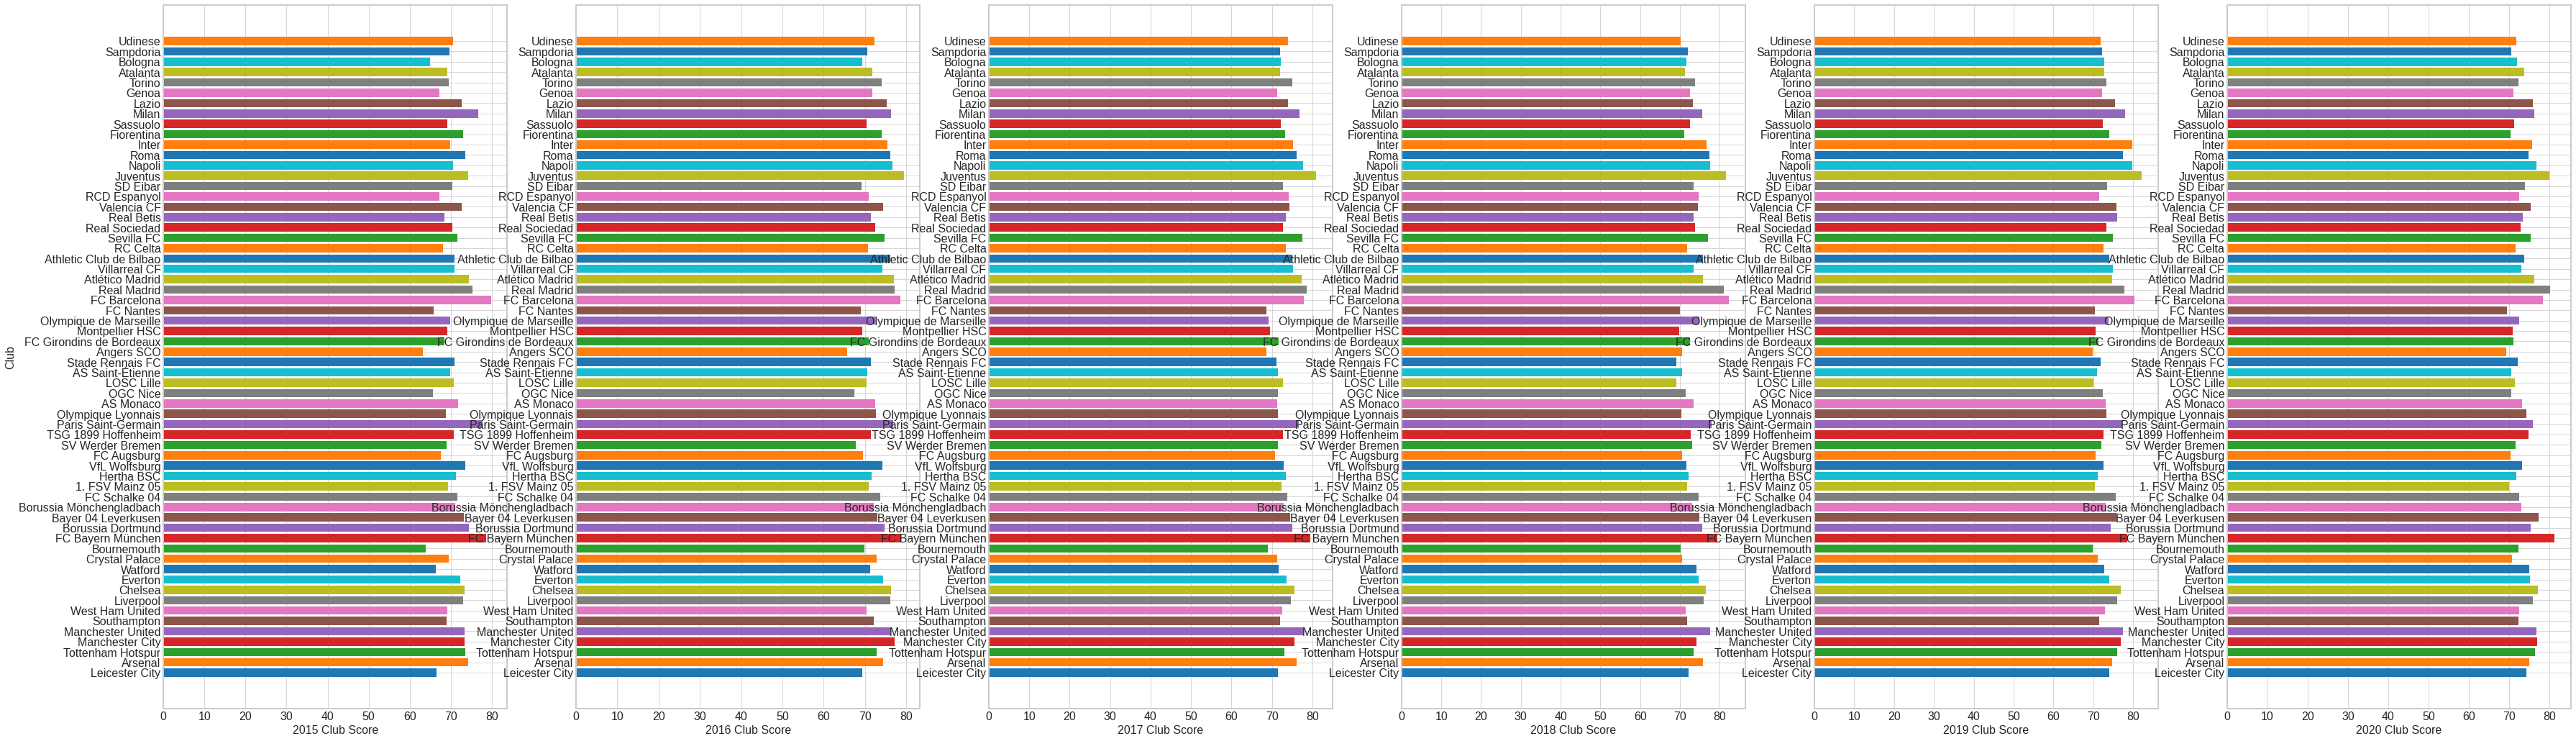

In [25]:
fig,ax = plt.subplots(1,6, figsize=(60,18))
for i in list(club_dict.keys()):
  ax[0].barh(i, club_dict[i][0])

ax[0].set_xlabel("2015 Club Score")
ax[0].set_ylabel("Club")
ax[0].legend()

for i in list(club_dict.keys()):
  ax[1].barh(i, club_dict[i][1])

ax[1].set_xlabel("2016 Club Score")
# ax[1].set_ylabel("Club")
ax[1].legend()

for i in list(club_dict.keys()):
  ax[2].barh(i, club_dict[i][2])

ax[2].set_xlabel("2017 Club Score")
# ax[2].set_ylabel("Club")
ax[2].legend()

for i in list(club_dict.keys()):
  ax[3].barh(i, club_dict[i][3])

ax[3].set_xlabel("2018 Club Score")
# ax[3].set_ylabel("Club")
ax[3].legend()

for i in list(club_dict.keys()):
  ax[4].barh(i, club_dict[i][4])

ax[4].set_xlabel("2019 Club Score")
# ax[4].set_ylabel("Club")
ax[4].legend()

for i in list(club_dict.keys()):
  ax[5].barh(i, club_dict[i][5])

ax[5].set_xlabel("2020 Club Score")
# ax[5].set_ylabel("Club")
ax[5].legend()

In [26]:
# we fitted the linear regression model to the data, and got the slope for the clubs
# the coef_ gives us the slopes, it signifies the change in the average club scores across the years.
# Although, it is applicable only for these 6 years data, because it is a linear model. 
# Or else, the constant slope will take the scores to infinity or negative values if years are more.
club_score_dict={}
for key in club_dict.keys():
    linreg = LinearRegression()
    linreg.fit(np.array(year_list).reshape(-1,1), club_dict[key])
    club_score_dict[key]= linreg.coef_[0]
#print(club_score_dict.values())   

In [27]:
# reading the players data for 2015.
# This can be seen as equivalent of the intercept, as it has the data for the first year( i.e - 2015)
df_15 = pd.read_csv('https://raw.githubusercontent.com/rraj29/data/main/players_15.csv')

# creating a dictionary to store the values of average scores of clubs in 2015
club_initial = {}
for club in club_list:
        df_new = df_15[df_15.club == club]

        club_2015_score = sum(df_new.overall)/len(df_new)
        club_initial[club] = club_2015_score

Text(0.5, 1.0, 'Club Improvement over 2015-2020 period')

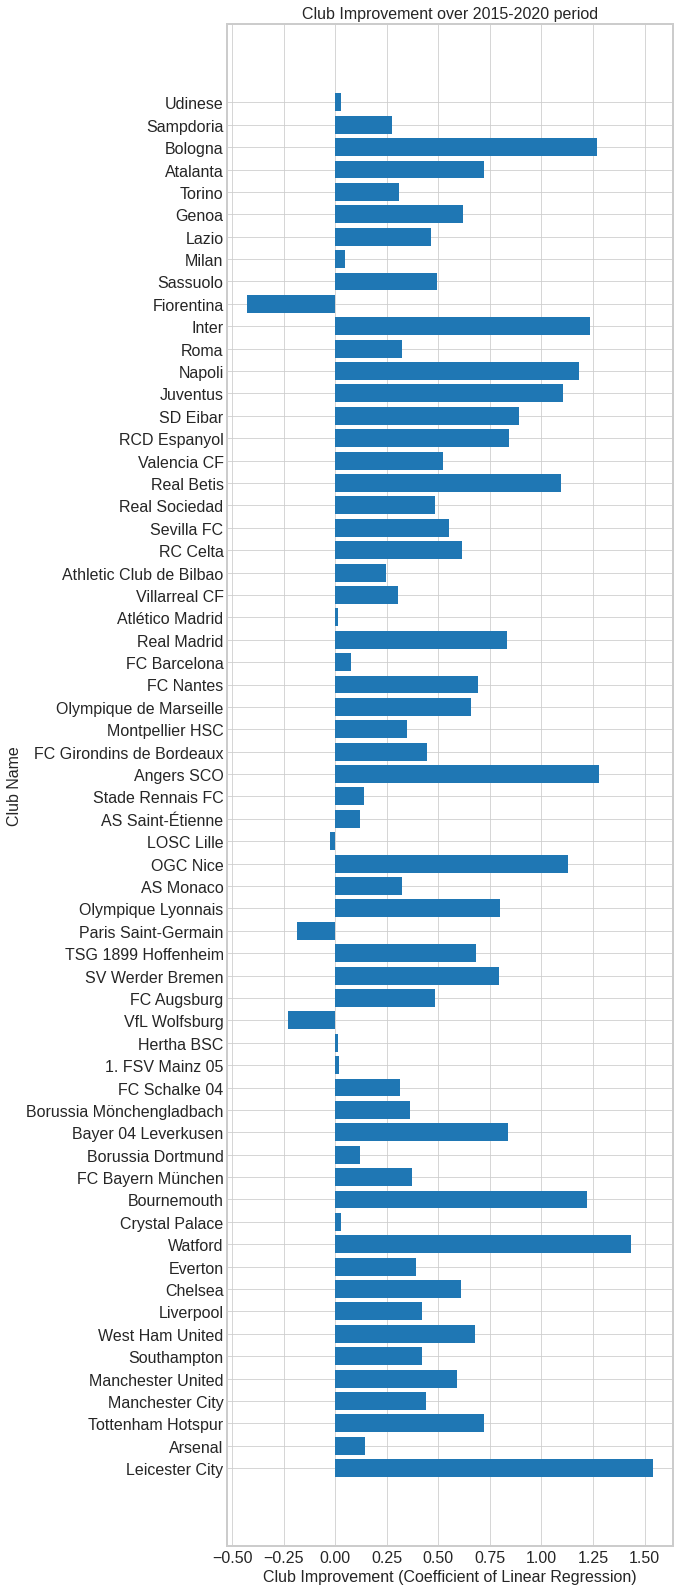

In [28]:
# plotting the graphs of the slopes(i.e.- value of slope of increase in scores in the years)
fig,ax = plt.subplots(1,1,figsize=(8,28))
ax.barh(list(club_score_dict.keys()), list(club_score_dict.values()))
ax.set_xlabel("Club Improvement (Coefficient of Linear Regression)")
ax.set_ylabel("Club Name")
ax.set_title("Club Improvement over 2015-2020 period")

Text(0.5, 1.0, 'Club Initial score in 2015')

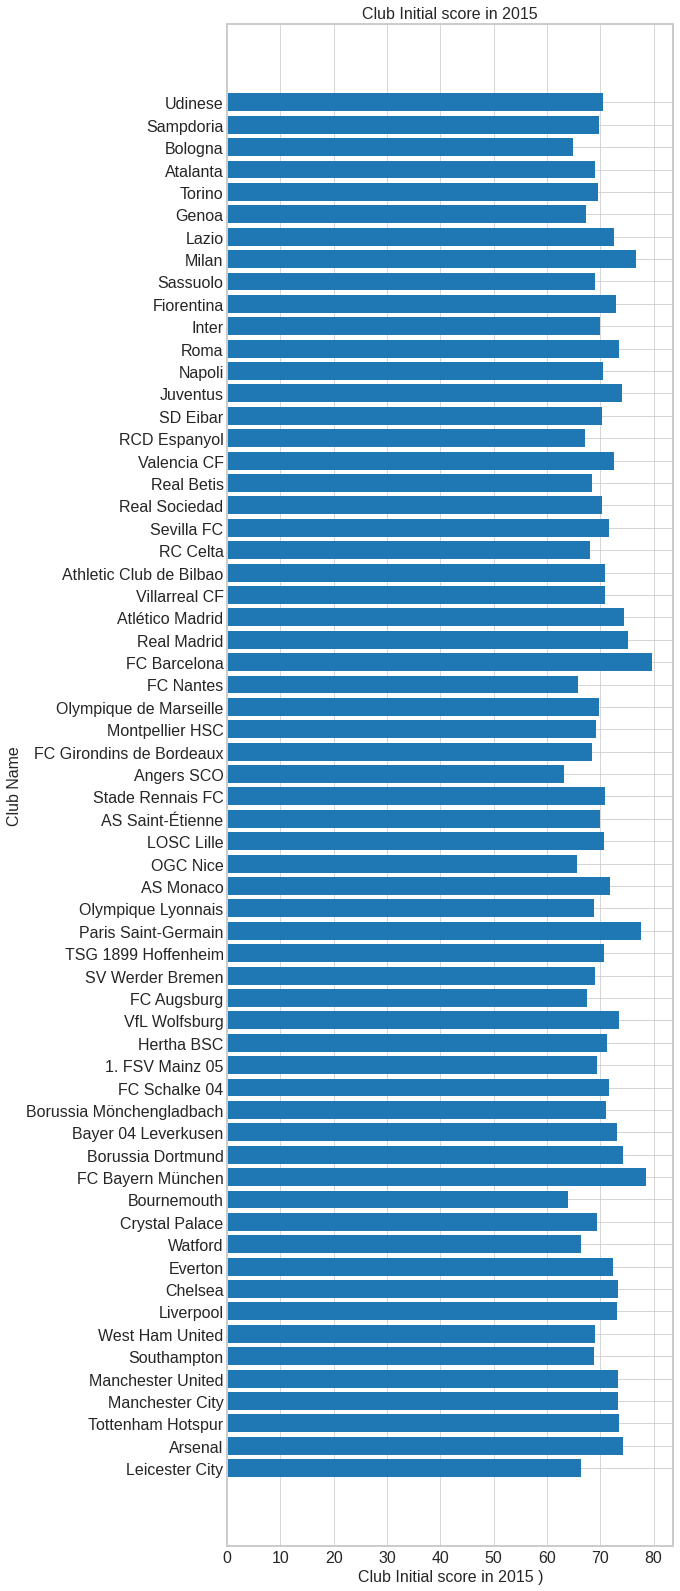

In [29]:
# plotting initial averages of clubs (i.e. 2015 averages)
fig,ax = plt.subplots(1,1,figsize=(8,28))
ax.barh(list(club_initial.keys()), list(club_initial.values()))
ax.set_xlabel("Club Initial score in 2015 )")
ax.set_ylabel("Club Name")
ax.set_title("Club Initial score in 2015")

In [30]:
# getting the maximum and minimum values
# this will be needed to keep the scores in the range of 0-100.
max_beta_value = max(list(club_score_dict.values()))
min_beta_value = min(list(club_score_dict.values()))

In [31]:
club_score={}
for key in club_score_dict.keys():
    club_score[key]= 100*(club_score_dict[key]- min_beta_value)/(max_beta_value-min_beta_value)

sorted_tuples = sorted(club_score.items(), key=lambda item: item[1])
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_dict = {k: v for k, v in sorted_tuples}

[('Fiorentina', 0.0), ('VfL Wolfsburg', 9.906072725402359), ('Paris Saint-Germain', 12.183240741142399), ('LOSC Lille', 20.418291082892363), ('Hertha BSC', 22.385825848355413), ('Atlético Madrid', 22.401426495074023), ('1. FSV Mainz 05', 22.652877412794293), ('Udinese', 23.081143650679252), ('Crystal Palace', 23.10684544995298), ('Milan', 24.058152098823662), ('FC Barcelona', 25.61456240549626), ('Borussia Dortmund', 27.641099350588966), ('AS Saint-Étienne', 27.75997546520216), ('Stade Rennais FC', 28.682902786640287), ('Arsenal', 28.98593730269143), ('Athletic Club de Bilbao', 34.172658201953276), ('Sampdoria', 35.647909239563795), ('Villarreal CF', 37.15716864969635), ('Torino', 37.39313384472856), ('FC Schalke 04', 37.633091127323816), ('AS Monaco', 38.075124686455766), ('Roma', 38.16119929483012), ('Montpellier HSC', 39.40720810609654), ('Borussia Mönchengladbach', 40.19323173384983), ('FC Bayern München', 40.47420744980452), ('Everton', 41.56770836411884), ('Southampton', 42.97436

Text(0.5, 1.0, 'Club Perfromance over the 2015-2020 period')

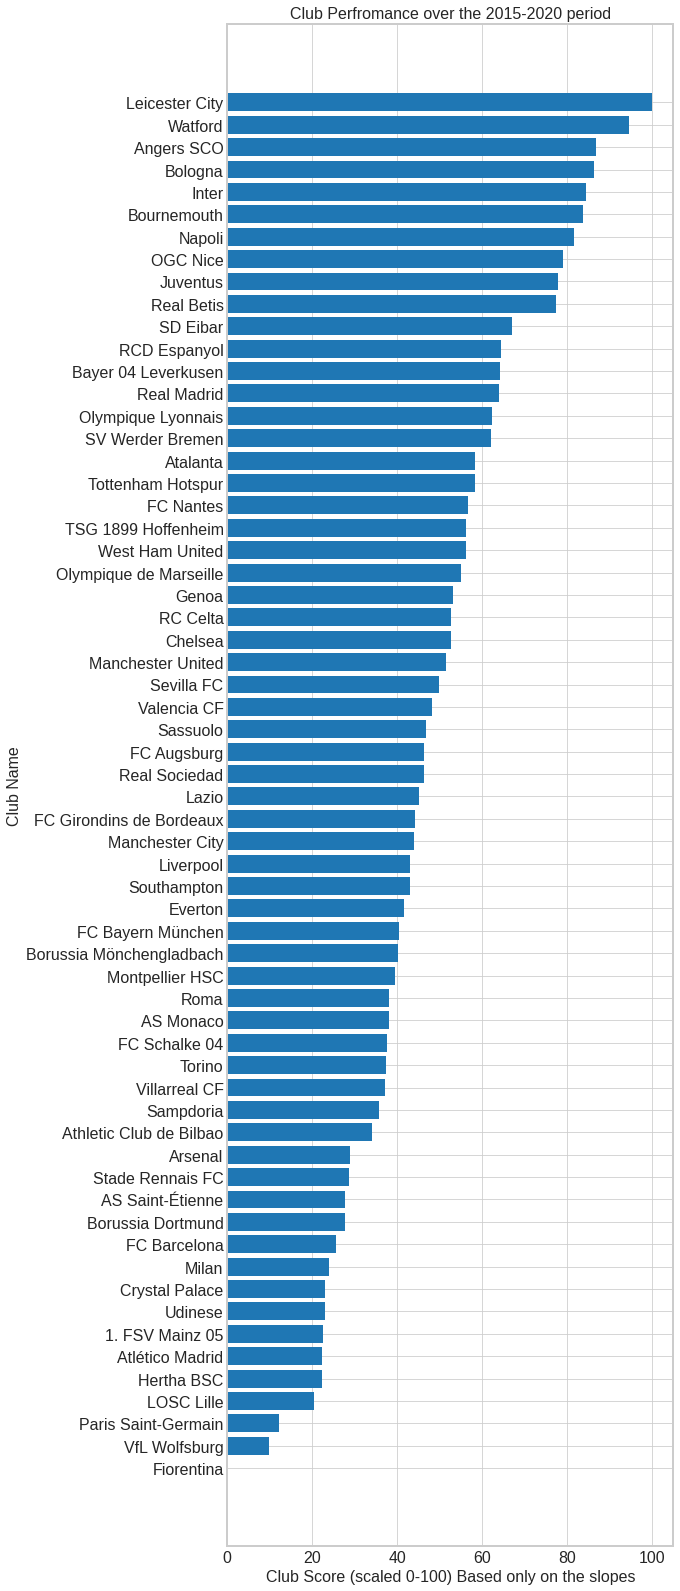

In [32]:
fig,ax = plt.subplots(1,1,figsize=(8,28))
ax.barh(list(sorted_dict.keys()), list(sorted_dict.values()))
ax.set_xlabel("Club Score (scaled 0-100) Based only on the slopes")
ax.set_ylabel("Club Name")
ax.set_title("Club Perfromance over the 2015-2020 period")

Earlier we had given the scores based only on the increase in team performance(overall averages).
But, it doesn't show the expected results.
We have to give the scores to the teams based on their performance and use these scores to find which clubs have the best support staff.<br>

For scoring, we haven't just considered the increase in the average overall scores because the teams which have lower initial score will have scope to improve and they will be improving at a faster rate. <br>

But, for the clubs with high initial scores, it is really hard to increase beyond a certain point. So, they have a lower slope, and it makes complete sense.<br>
So, to penalize the higher slopes of the teams with lower initial scores, we have given 95% weightage to the initial scores. We validated the results from the results that we got from the actual rankings of the clubs in 2020 form the following link: https://kassiesa.net/uefa/data/method5/trank2020.html <br>
This has been done after many trial and errors, these weights gives us the closest rankings for the teams, as seen in 2020. 

In [33]:
club_score_scaled={}
for key in club_score_dict.keys():
    club_score_scaled[key]= 0.95*club_initial[key] + 5*(club_score_dict[key]- min_beta_value)/(max_beta_value-min_beta_value)

sorted_tuples = sorted(club_score_scaled.items(), key=lambda item: item[1])
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_dict = {k: v for k, v in sorted_tuples}

[('Angers SCO', 64.42098951479373), ('Bournemouth', 64.91952456684785), ('FC Nantes', 65.30701807232569), ('Bologna', 65.95964853902302), ('OGC Nice', 66.2815539800443), ('FC Augsburg', 66.51438938764693), ('Genoa', 66.53735702136858), ('1. FSV Mainz 05', 67.0092063706397), ('RCD Espanyol', 67.01466216281587), ('Crystal Palace', 67.10837257552795), ('FC Girondins de Bordeaux', 67.19621274826568), ('RC Celta', 67.33384644017742), ('Southampton', 67.61235440380433), ('Montpellier HSC', 67.69000326244769), ('Watford', 67.74497491616344), ('AS Saint-Étienne', 67.75696429050149), ('Torino', 67.93783851041825), ('Sassuolo', 67.94711148689652), ('Sampdoria', 67.97703831912104), ('Leicester City', 68.13181818181818), ('LOSC Lille', 68.17860686183693), ('Udinese', 68.18843218253396), ('Olympique Lyonnais', 68.4368896995404), ('West Ham United', 68.44382581308115), ('Atalanta', 68.53034020172274), ('SV Werder Bremen', 68.58530757469191), ('Hertha BSC', 68.78380742145002), ('Stade Rennais FC', 68

Text(0.5, 1.0, 'Club Perfromance over the 2015-2020 period')

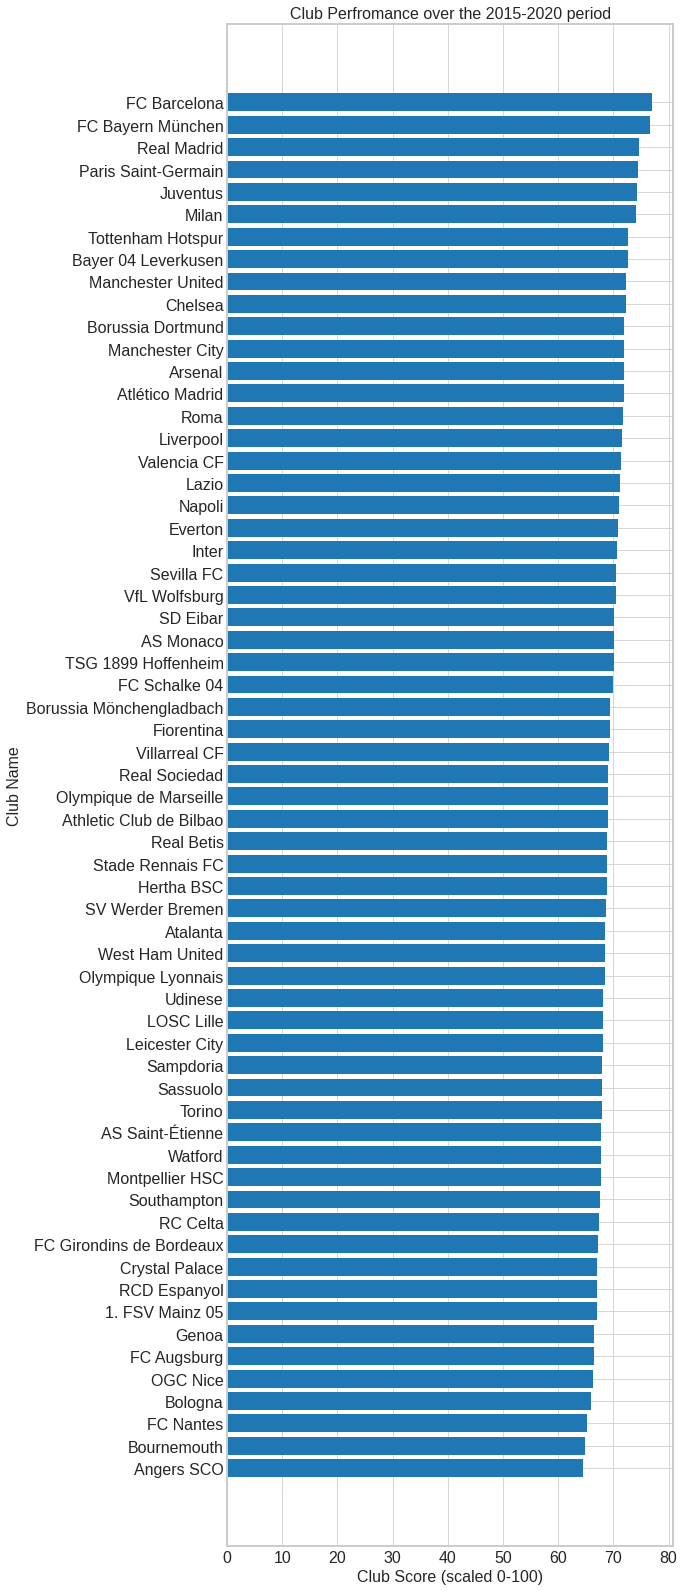

In [34]:
fig,ax = plt.subplots(1,1,figsize=(8,28))
ax.barh(list(sorted_dict.keys()), list(sorted_dict.values()))
ax.set_xlabel("Club Score (scaled 0-100)")
ax.set_ylabel("Club Name")
ax.set_title("Club Perfromance over the 2015-2020 period")

This result is very different from what we have got in our analysis. We compared our results to this, but then we came up with the following justifications for our scores and the class averages:<br>
The class average has Bayern Munchen and the clubs with high overall averges ranked very low. It is because they have given a lot of weightage to the increase in performance. If we see the data, the clubs whose players are all highly rated and have high overall scores can't increase a lot. <br>

If we give very high weightage to the increase in performance, that would suggest that a player could even reach an overall score of 1000 in next few years. That's not possible at all. There is a limit beyond which the the abilities of humans can't go(in this case, it's an overall score of 100).<br>

We used the metric that if a club was wiining leagues and getting good points, then the support staff is working great.
So, rather than calculating the MSE with the class average, we validated our results with the real data of 2020. It gave the rankings of the clubs. We found that our data was representative of the actual results. The link where we found the data is https://kassiesa.net/uefa/data/method5/trank2020.html <br>


